In [1]:
#predict diabetes using Logistic Regression Classifier.

In [52]:
#importinglibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df=pd.read_csv("diabetes_dataset.csv")

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
#selecting columns into independent(feature) and dependent(target-which we have to predict) var:
#features
X=df[['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']]
#target
y=df["Outcome"]    

In [29]:
#splitting dataset into training and validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=0)

In [33]:
#model development and prediciton 
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

#prediction output
y_pred=logreg.predict(X_test)

In [37]:
#Equation coefficient and intercept.
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)

Coefficient: 
 [[ 0.09848589 -0.00101922  0.08424723  0.01702585  0.0315405  -0.00710835
   0.94192301]]
Intercept: 
 [-8.14073468]


In [41]:
#model evalution using cond=fusion matrix:\
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[228,  25],
       [ 56,  75]], dtype=int64)

Here out of total:
228,75 are actual predictions.
25,56 are inaccurate prediciton.

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.7890625
Precision: 0.75
Recall: 0.5725190839694656


Here, we got classification rate as 78%.
Our model is 75% correct (precision score)

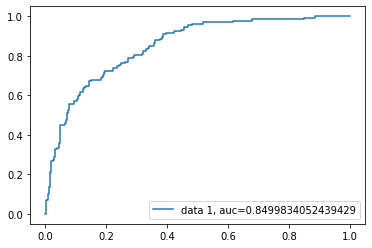

In [53]:
#build ROC Curve:\
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score is 0.84 which is good.
AUC Score of 0.5 is worthless classifier while AUC Score=1 is perfect classifier.